# RL an introduction by Sutton and Barto
## Chapter 4, p 84 example 4.2 gamler's problem
* [solution](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction)

In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.use('Agg')
%matplotlib inline

In [7]:
# goal setting
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)

# probability of head
HEAD_PROB = 0.4

In [8]:
# initialize the value function
state_value = np.zeros(GOAL + 1)
state_value[GOAL] = 1.0

sweeps_history = []

In [17]:
# value iteration
while True:
    old_state_value = state_value.copy()
    sweeps_history.append(old_state_value)
    
    for state in STATES[1:GOAL]: # states[0] doesn't have value or policy.
        # get possible actions for current state
        actions = np.arange(min(state, GOAL - state) + 1) # maximal stake is min(current state, remain coin to GOAL)
        action_returns = []
        for action in actions:
            action_returns.append(HEAD_PROB * state_value[state + action] + # win the game
                                  (1 - HEAD_PROB) * state_value[state - action]) # lose the game
        new_value = np.max(action_returns)
        state_value[state] = new_value # update value function
    delta = abs(state_value - old_state_value).max()
    if delta < 1e-9: # theta = 1e-9
        sweeps_history.append(state_value)
        break

In [19]:
final_sweep = len(sweeps_history) - 1

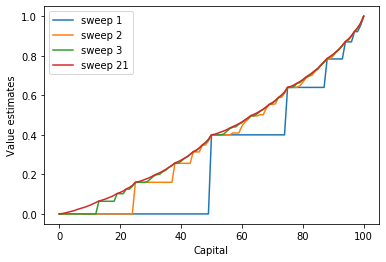

In [20]:
for i in [1,2,3,final_sweep]:
    plt.plot(sweeps_history[i], label='sweep {}'.format(i)) # modified from original code to show few history.
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='best')

In [29]:
# compute the optimal policy
policy = np.zeros(GOAL + 1)
for state in STATES[1:GOAL]: # we does not update the 0, 100 state
    actions = np.arange(min(state, GOAL - state) + 1)
    action_returns = []
    for action in actions:
        action_returns.append(HEAD_PROB * state_value[state + action] + 
                              (1 - HEAD_PROB) * state_value[state - action])

    # round to resemble the figure in the book, see
    # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83
    policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1] 
    # if action_returns[1:], gambler alway take 0 stake.

Text(0, 0.5, 'Final policy (stake)')

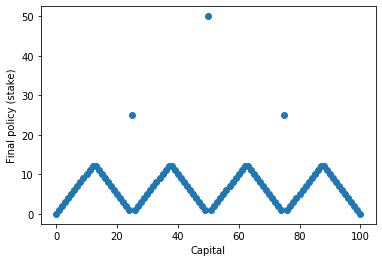

In [31]:
plt.scatter(STATES, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')

### To test other head probability, make function for it.

In [84]:
def example_4_2(HEAD_PROB):
    # initialze value function
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0

    sweeps_history = []
    # value iteration
    while True:
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)
    
        for state in STATES[1:GOAL]: # states[0] doesn't have value or policy.
            # get possible actions for current state
            actions = np.arange(min(state, GOAL - state) + 1) # maximal stake is min(current state, remain coin to GOAL)
            action_returns = []
            for action in actions:
                action_returns.append(HEAD_PROB * state_value[state + action] + # win the game
                                      (1 - HEAD_PROB) * state_value[state - action]) # lose the game
            new_value = np.max(action_returns)
            state_value[state] = new_value # update value function
        delta = abs(state_value - old_state_value).max()
        if delta < 1e-9: # theta = 1e-9
            sweeps_history.append(state_value)
            break
    # compute the optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]: # we does not update the 0, 100 state
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(HEAD_PROB * state_value[state + action] + 
                                  (1 - HEAD_PROB) * state_value[state - action])

        # round to resemble the figure in the book, see
        # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1] 
        # if action_returns[1:], gambler alway take 0 stake.
    final_sweep = len(sweeps_history) - 1
    plt.figure(figsize=(10,20))
    plt.subplot(2,1,1)
    for i in [1,2,3,int(final_sweep/2),final_sweep]:
        plt.plot(sweeps_history[i], label='sweep {}'.format(i)) # modified from original code to show few history.
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
    
    plt.subplot(2,1,2)
    plt.plot(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')   

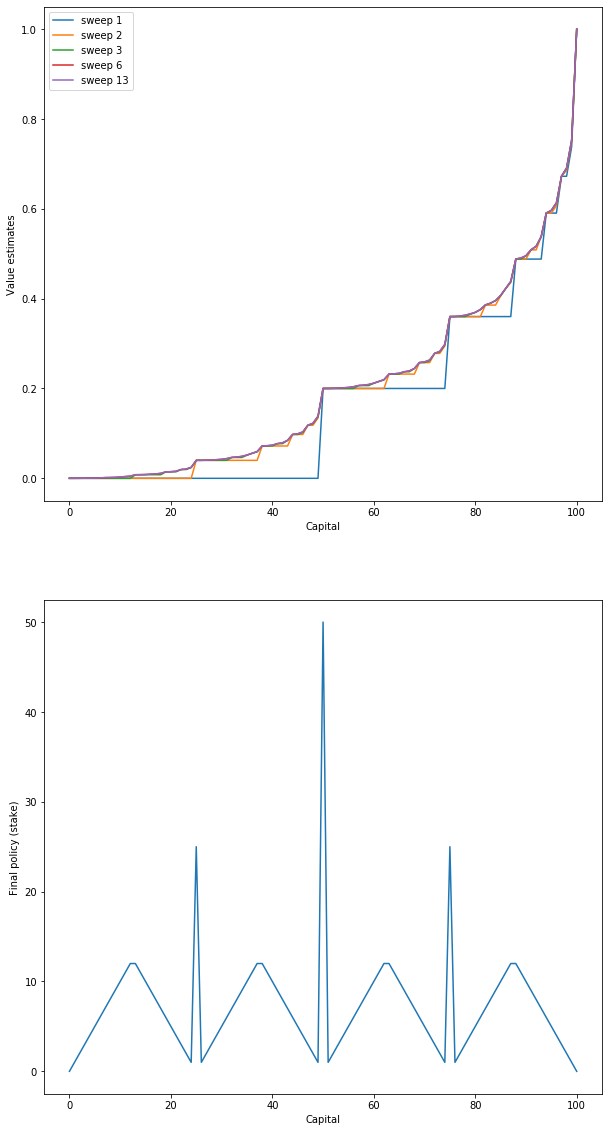

In [85]:
example_4_2(0.2)

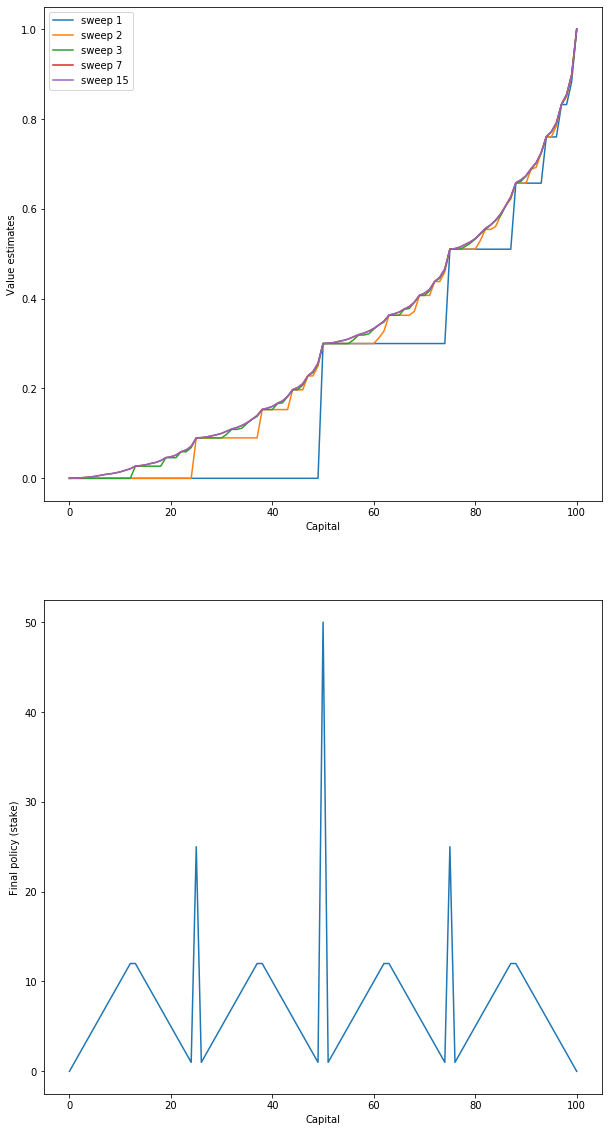

In [86]:
example_4_2(0.3)

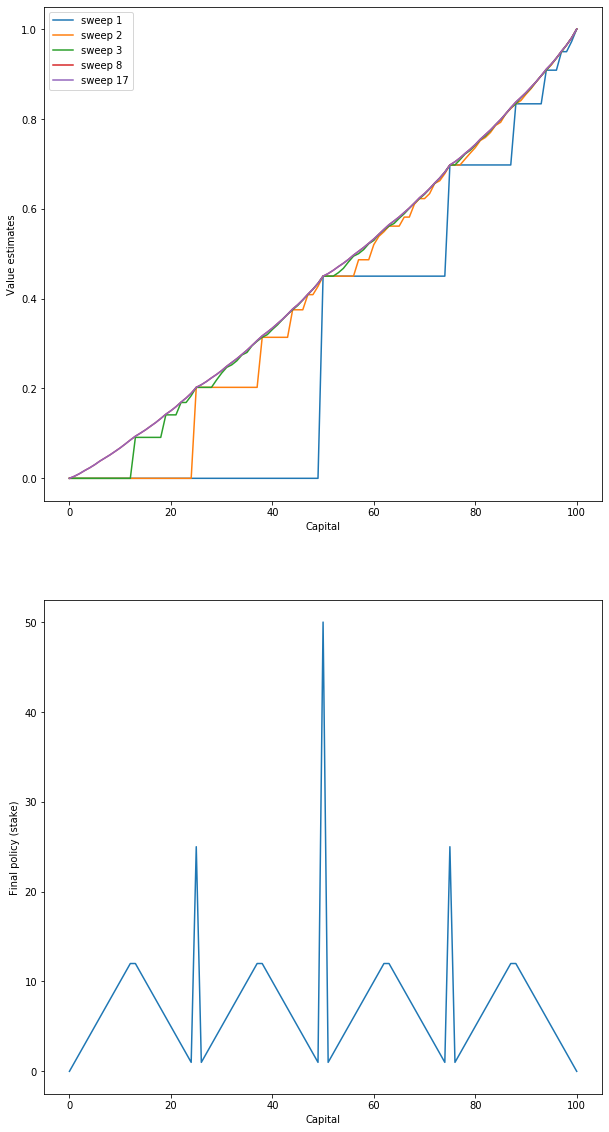

In [87]:
example_4_2(0.45)

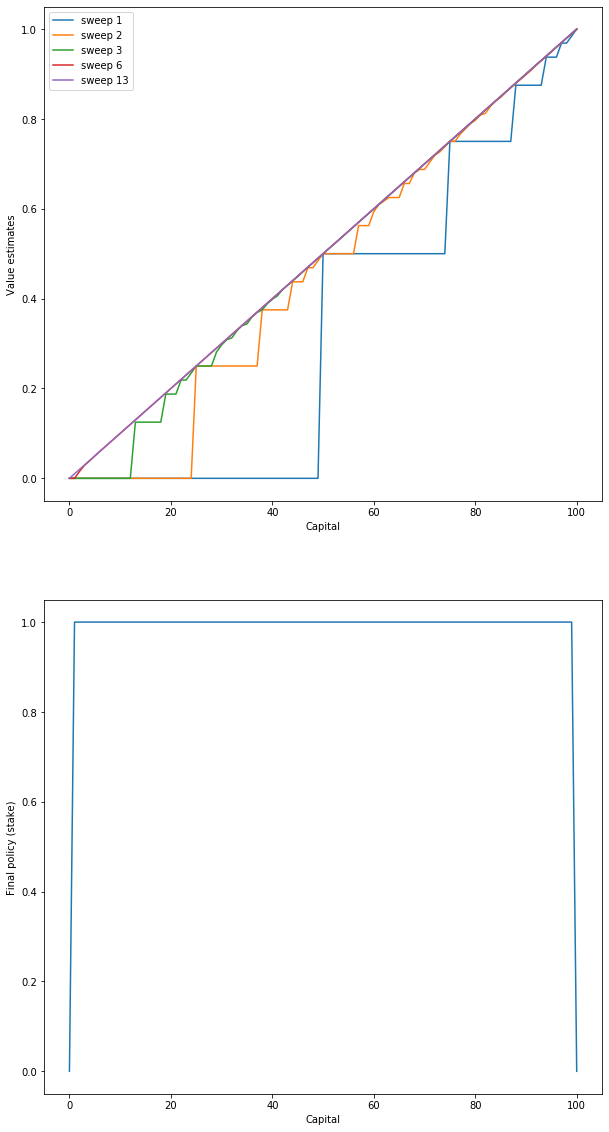

In [88]:
example_4_2(0.5)

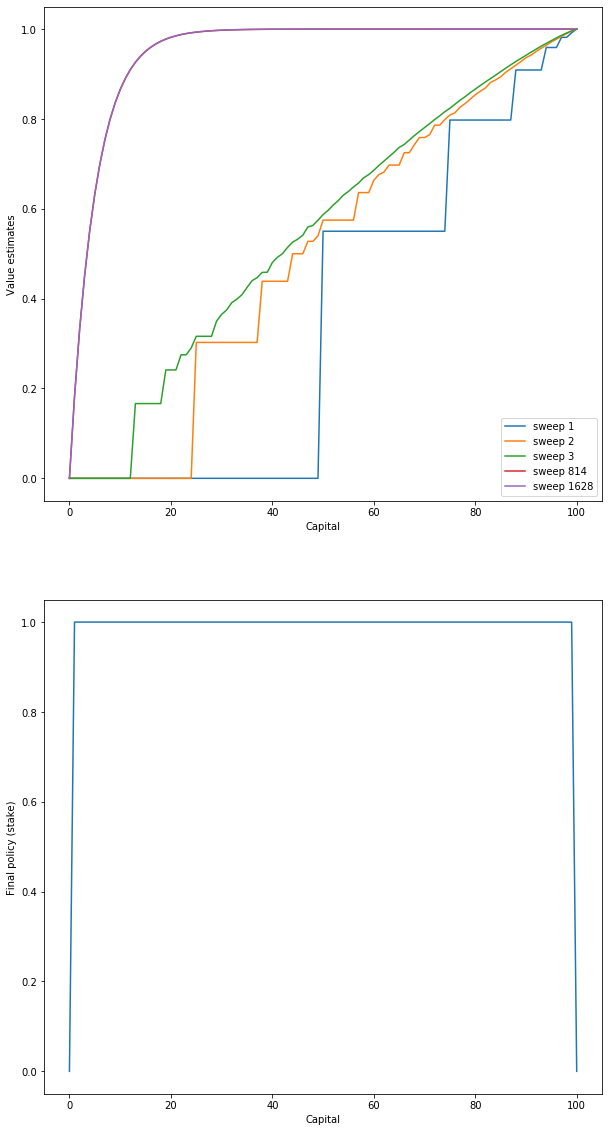

In [89]:
example_4_2(0.55)

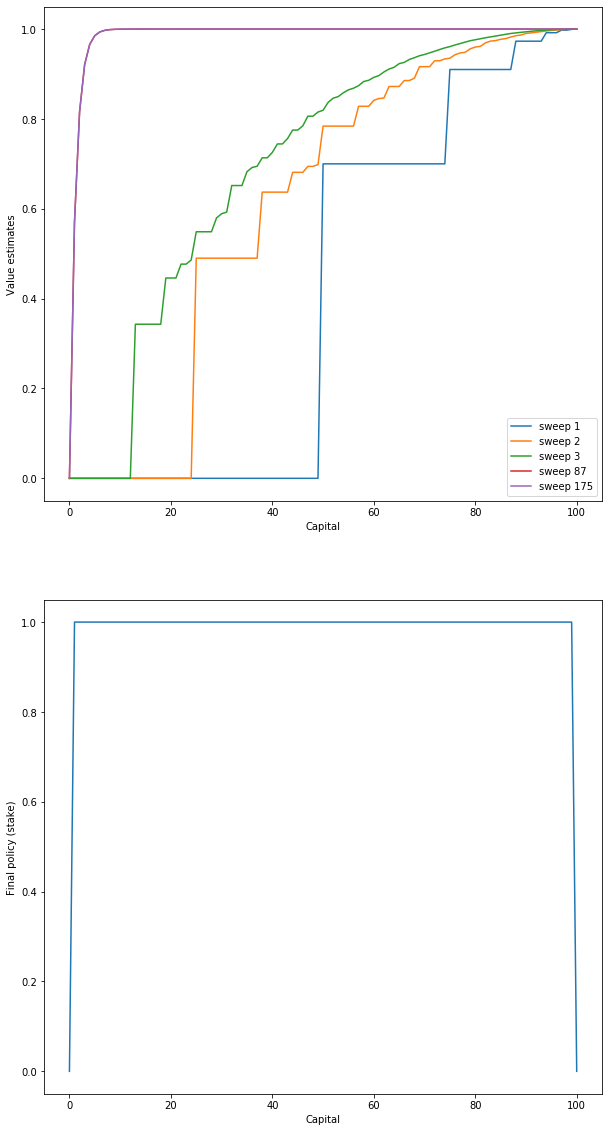

In [90]:
example_4_2(0.7)